In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv('Breast_cancer_data.csv')
data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


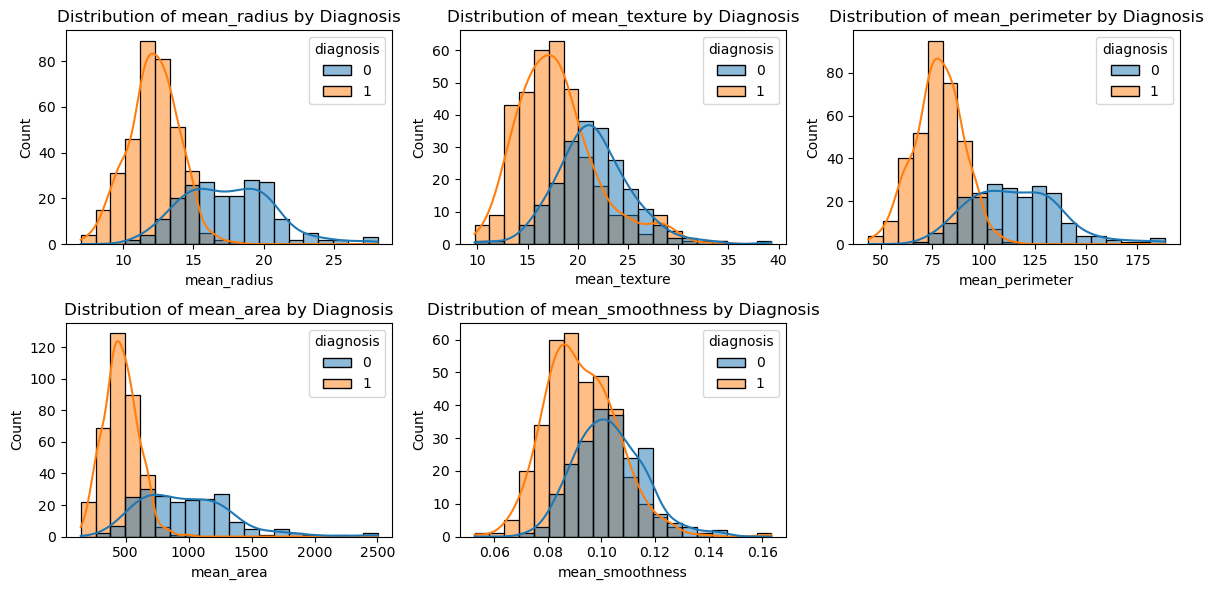

In [30]:

X = data.drop('diagnosis', axis=1) 
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize feature distributions
plt.figure(figsize=(12, 6))
for i, feature in enumerate(X.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=data, x=feature, hue='diagnosis', bins=20, kde=True)
    plt.title(f'Distribution of {feature} by Diagnosis')
plt.tight_layout()
plt.show()

# Model Training and Evaluation
model = RandomForestClassifier(random_state=42)

After analyzing the dataset we can observe that it has multiple informative features, including 5 features with non-linear relationships with the diagnosis. Given the complexity of the data, we need a model that can capture these relationships effectively.

In [31]:
X = data.drop('diagnosis', axis=1) # all other columns besides diagonsis
y = data['diagnosis']

#allocating 20% of the dataset to testing and the other 80% to training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1 : logistic regression 
logistic_model = LogisticRegression(max_iter=1000)

logistic_model.fit(X_train_scaled, y_train)
logistic_model.fit(X_train, y_train)

# Model 2: Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    return scores

logistic_scores = evaluate_model(logistic_model, X, y)
random_forest_scores = evaluate_model(random_forest_model, X, y)

print("Logistic Regression Cross-Validation Scores:", logistic_scores)
print("Random Forest Cross-Validation Scores:", random_forest_scores)

def evaluate_on_test(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

logistic_metrics = evaluate_on_test(logistic_model, X_test, y_test)
random_forest_metrics = evaluate_on_test(random_forest_model, X_test, y_test)

# Print evaluation metrics for both models
print("\nLogistic Regression Metrics on Test Set:")
for metric, value in logistic_metrics.items():
    print(f"{metric}: {value}")

print("\nRandom Forest Metrics on Test Set:")
for metric, value in random_forest_metrics.items():
    print(f"{metric}: {value}")


Logistic Regression Cross-Validation Scores: [0.85964912 0.90350877 0.92982456 0.93859649 0.90265487]
Random Forest Cross-Validation Scores: [0.89473684 0.89473684 0.95614035 0.96491228 0.91150442]

Logistic Regression Metrics on Test Set:
Accuracy: 0.9298245614035088
Precision: 0.9565217391304348
Recall: 0.9295774647887324
F1 Score: 0.9428571428571428
ROC AUC: 0.9299050114641336

Random Forest Metrics on Test Set:
Accuracy: 0.9473684210526315
Precision: 0.9710144927536232
Recall: 0.9436619718309859
F1 Score: 0.9571428571428571
ROC AUC: 0.9485751719620047


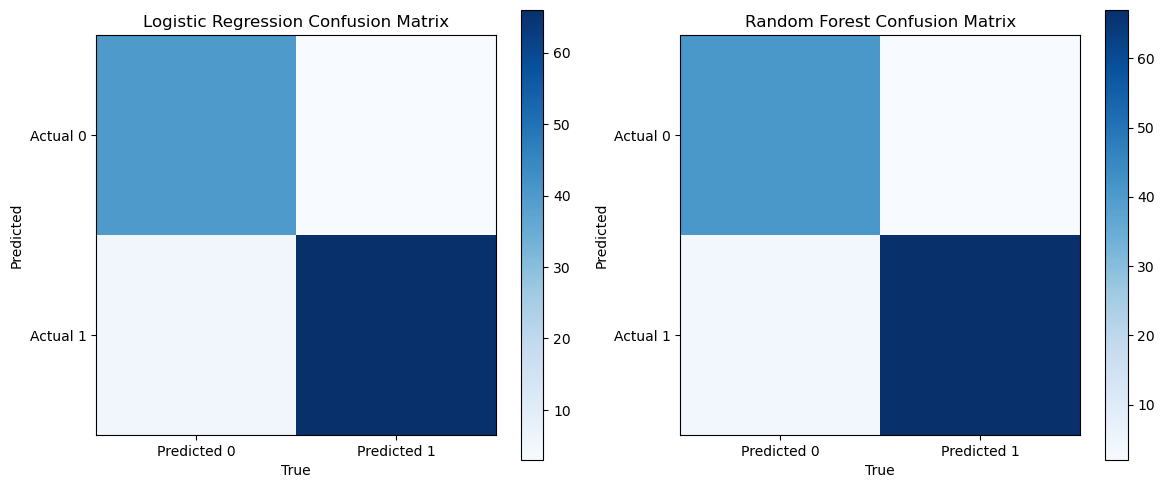

In [32]:
from sklearn.metrics import confusion_matrix, auc
import matplotlib.pyplot as plt

# Predictions using Logistic Regression and Random Forest
logistic_predictions = logistic_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

# Confusion Matrix for Logistic Regression
logistic_confusion = confusion_matrix(y_test, logistic_predictions)

# Confusion Matrix for Random Forest
random_forest_confusion = confusion_matrix(y_test, random_forest_predictions)


# Plot Confusion Matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Logistic Regression Confusion Matrix")
plt.imshow(logistic_confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['Actual 0', 'Actual 1'])
plt.xlabel("True")
plt.ylabel("Predicted")

plt.subplot(1, 2, 2)
plt.title("Random Forest Confusion Matrix")
plt.imshow(random_forest_confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['Actual 0', 'Actual 1'])
plt.xlabel("True")
plt.ylabel("Predicted")

plt.tight_layout()

plt.show()


In [33]:
model =  random_forest_model  

# Function to accept user input and make predictions
def predict_diagnosis():
    print("Enter the values for the following features:")
    
    features = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area','mean_smoothness']
    
    user_input = {}
    
    for feature in features:
        value = float(input(f"{feature}: "))
        user_input[feature] = [value]
    
    input_data = pd.DataFrame(user_input)
    
    
    predictions = model.predict(input_data)
    
    
    if predictions[0] == 0:
        print("Predicted Diagnosis: 0 (Negative)")
    else:
        print("Predicted Diagnosis: 1 (Positive)")

# Call the prediction function
predict_diagnosis()


Enter the values for the following features:
mean_radius: 18
mean_texture: 18
mean_perimeter: 18
mean_area: 18
mean_smoothness: 18
Predicted Diagnosis: 0 (Negative)
